# Домашнее задание 2. Классификация, детекция.

Оценка за часть 1 и часть 2 в этом дз -- по 5 баллов.

## Часть 1. Классификация

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в датасете есть. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train и val, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат собственно сами изображения.
 
__Задание__. Добейтесь accuracy **не менее 0.44**. Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи/блогпосты/вопросы на stackoverflow/видосы от (индийских) ютуберов/курсы/подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

В коде ниже необходимо, чтобы код проходил все `assert`'ы.

Необходимо написать функцию `predict` по шаблону ниже. Эта функция принимает на вход модель, даталоадер с валидационнами данными, criterion для подсчёта лосса и device, на котором будут производиться вычисления (определён ниже) и возвращает список лоссов по всем объектам, список из предсказанных классов для каждого объекта из из даталоалера и список из настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено__. Можно использовать предобученные модели из `torchvision`.

__Критерии оценки__: Оценка вычисляется по простой формуле: min(5, 5 * Ваша accuracy / 0.44). Оценка округляется до десятых по арифметическим правилам.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать на защите :)
 - Используйте аугментации. Для этого пользуйтесь модулем torchvision.transforms или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - (ещё раз) Можно файнтюнить предобученные модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом ImageFolder), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы отладить код, пробуйте обучаться на маленькой части датасета. Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать гпу. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [1]:
!wget https://www.dropbox.com/s/kzxc2f3b2i6ipxn/dataset.zip
!unzip -q dataset.zip
!ls -l

--2020-11-30 23:33:00--  https://www.dropbox.com/s/kzxc2f3b2i6ipxn/dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/kzxc2f3b2i6ipxn/dataset.zip [following]
--2020-11-30 23:33:00--  https://www.dropbox.com/s/raw/kzxc2f3b2i6ipxn/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc47be71f9f13197e13694f9f62e.dl.dropboxusercontent.com/cd/0/inline/BENCGIO7g70z9Y4od-BB1MOWt098AmAVBXhTjnBKYbPCJ4p_vbOt-1DqGs-fptAWB1iUxTFaDQ-5GXBwWr-ihvuy53a3XgFB8NhiqAd3a291xBzf6Pw_LcY2VzGM-c9cw1M/file# [following]
--2020-11-30 23:33:01--  https://uc47be71f9f13197e13694f9f62e.dl.dropboxusercontent.com/cd/0/inline/BENCGIO7g70z9Y4od-BB1MOWt098AmAVBXhTjnBKYbPCJ4p_vbOt-1DqGs-fptAWB1iUxTFaDQ-5GXBwWr-ihvuy53a3XgFB8NhiqAd3a291xBzf6Pw_L

In [2]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
import numpy as np
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.models import resnet18
import sys
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import time
# You may add any imports you need

На этом момент начал смотртеть следующее видео "#4: Image Transforms, ImageFolder, DataLoader, Sampler, use data from Google Drive": https://www.youtube.com/watch?v=5rW_PZI4B2I&feature=emb_logo

In [3]:
train_dir = './dataset/dataset/train'
val_dir = './dataset/dataset/val'

In [4]:
norm_means = torch.from_numpy(np.array([0.485, 0.456, 0.406]))
norm_stds = torch.from_numpy(np.array([0.229, 0.224, 0.225]))

In [7]:
train_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.RandomRotation(45),
        # transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=norm_means, std=norm_stds)
])
val_transform = transforms.Compose([
        transforms.Resize(224),
        # transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=norm_means, std=norm_stds)
])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = ImageFolder(train_dir, transform=train_transform)
val_dataset = ImageFolder(val_dir, transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

In [8]:
# Just very simple checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [9]:
device = 'cuda:0'
torch.cuda.is_available()

True

Взял код из 5-6 семинара.

In [10]:
def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0"):
    # YOUR CODE
    # TRAIN YOUR MODEL HERE
    model = model.to(device).train()

    with tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
        for images, labels in train_dataloader: 
          images = images.to(device)
          labels = labels.to(device)

          outputs = model(images)
          loss = criterion(outputs, labels)
          
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          accuracy = (outputs.argmax(1) == labels).float().mean()
              
          prbar.set_description(
                  f"Loss: {round(loss.item(), 4)} "
                  f"Accuracy: {round(accuracy.item() * 100, 4)}"
          )
          prbar.update(1)


def predict(model, val_dataloder, criterion, device="cuda:0"):
    # YOUR CODE
    # predict val_dataloader and print and return the validation accuracy
    model = model.eval()

    losses = np.array([])
    predicted_classes = np.array([])
    true_classes = np.array([])
    batches = 0
    total_loss = 0
    losses = []

    with tqdm(total=len(val_dataloader), file=sys.stdout) as prbar:
        for images, labels in val_dataloader: 
          images = images.to(device)
          labels = labels.to(device)

          outputs = model(images)
          loss = criterion(outputs, labels)

          accuracy = (outputs.argmax(1) == labels).float().mean()
              
          prbar.set_description(
                  f"Loss: {round(loss.item(), 4)} "
                  f"Accuracy: {round(accuracy.item() * 100, 4)}"
          )
          prbar.update(1)

          batches += 1
          total_loss += loss.item()
          predicted_classes = np.append(predicted_classes, outputs.argmax(1).cpu().detach().numpy())
          true_classes = np.append(true_classes, labels.cpu().detach().numpy())
          losses.append(loss.detach().item())

        return losses, predicted_classes, true_classes


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    # YOUR CODE
    # Train, evaluate, print accuracy, make a step of scheduler or whatever you want...
    model.to(device)
    for epoch in range(n_epochs): 
      print("EPOCH {}/{}".format(epoch + 1, n_epochs))
      start = time.time()
      print('Train')
      train_one_epoch(model, train_dataloader, criterion, optimizer, device)
      print('Val')
      with torch.no_grad(): 
        losses, predicted_classes, true_classes = predict(model, val_dataloader, criterion, device=device)
      end = time.time()
      print("epoch {} done in {}s".format(epoch, round(end - start, 2)))
      print("Accuracy after epoch {} is {}:".format(epoch + 1, round(accuracy_score(true_classes, predicted_classes) * 100, 2)))

In [11]:
model_1 = resnet18(pretrained=True) # THE MODEL THAT YOU CHOOSE
for param in model_1.parameters():
    param.requires_grad = False
model_1.fc = nn.Linear(512, 200)
model_1.to(device)

optimizer = torch.optim.Adam(model_1.fc.parameters(), 1e-4) # YOUR OPTIMIZER
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=1) # TRAIN DATALOADER WHICH YOU CONSTRUCT
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=True, num_workers=1) # VAL DATALOADER WHICH YOU CONSTRUCT
criterion = nn.CrossEntropyLoss() # LOSS THAT YOU OPTIMIZE (SHOLD BE CROSS ENTROPY OR SMTH ELSE)
scheduler = None # LR SCHEDULE THAT YOU PROBABLY CHOOSE
n_epochs = 4 # NUMBER OF EPOCHS
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


Простой тест на проверку правильности написанного кода

In [13]:
all_losses, predicted_labels, true_labels = predict(model_1, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

Loss: 5.4272 Accuracy: 0.0: 100%|██████████| 40/40 [00:25<00:00,  1.55it/s]
tests passed


Запустить обучение можно в ячейке ниже.

ЭКСПЕРИМЕНТ 1

In [15]:
train(model_1, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

EPOCH 1/4
Train
Loss: 4.6799 Accuracy: 15.0: 100%|██████████| 391/391 [04:54<00:00,  1.33it/s]
Val
Loss: 4.6699 Accuracy: 12.5: 100%|██████████| 40/40 [00:25<00:00,  1.58it/s]
epoch 0 done in 319.5s
Accuracy after epoch 1 is 11.89:
EPOCH 2/4
Train
Loss: 4.2401 Accuracy: 21.875: 100%|██████████| 391/391 [04:51<00:00,  1.34it/s]
Val
Loss: 3.9912 Accuracy: 25.0: 100%|██████████| 40/40 [00:25<00:00,  1.56it/s]
epoch 1 done in 317.03s
Accuracy after epoch 2 is 23.59:
EPOCH 3/4
Train
Loss: 3.8354 Accuracy: 28.125: 100%|██████████| 391/391 [04:53<00:00,  1.33it/s]
Val
Loss: 3.6022 Accuracy: 31.25: 100%|██████████| 40/40 [00:25<00:00,  1.56it/s]
epoch 2 done in 319.7s
Accuracy after epoch 3 is 30.02:
EPOCH 4/4
Train
Loss: 3.4013 Accuracy: 38.125: 100%|██████████| 391/391 [04:54<00:00,  1.33it/s]
Val
Loss: 3.0667 Accuracy: 31.25: 100%|██████████| 40/40 [00:25<00:00,  1.56it/s]
epoch 3 done in 320.02s
Accuracy after epoch 4 is 34.61:


ЭСПЕРИМЕНТ 2

В аугментации были такие параметры как transforms.RandomRotation(45), transforms.RandomHorizontalFlip(). Попробуем их убрать и посмортеть на то, какое качество покажет ResNet18 за 4 эпохи.

In [20]:
train_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=norm_means, std=norm_stds)
])
val_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=norm_means, std=norm_stds)
])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = ImageFolder(train_dir, transform=train_transform)
val_dataset = ImageFolder(val_dir, transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

In [21]:
model_2 = resnet18(pretrained=True) # THE MODEL THAT YOU CHOOSE
for param in model_2.parameters():
    param.requires_grad = False
model_2.fc = nn.Linear(512, 200)
model_2.to(device)

optimizer = torch.optim.Adam(model_2.fc.parameters(), 1e-4) # YOUR OPTIMIZER
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=1) # TRAIN DATALOADER WHICH YOU CONSTRUCT
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=True, num_workers=1) # VAL DATALOADER WHICH YOU CONSTRUCT
criterion = nn.CrossEntropyLoss() # LOSS THAT YOU OPTIMIZE (SHOLD BE CROSS ENTROPY OR SMTH ELSE)
scheduler = None # LR SCHEDULE THAT YOU PROBABLY CHOOSE
n_epochs = 4 # NUMBER OF EPOCHS
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [22]:
train(model_2, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

EPOCH 1/4
Train
Loss: 4.1909 Accuracy: 25.625: 100%|██████████| 391/391 [04:06<00:00,  1.59it/s]
Val
Loss: 4.2177 Accuracy: 18.75: 100%|██████████| 40/40 [00:24<00:00,  1.63it/s]
epoch 0 done in 271.21s
Accuracy after epoch 1 is 27.61:
EPOCH 2/4
Train
Loss: 3.4254 Accuracy: 38.125: 100%|██████████| 391/391 [03:54<00:00,  1.67it/s]
Val
Loss: 3.5503 Accuracy: 18.75: 100%|██████████| 40/40 [00:23<00:00,  1.72it/s]
epoch 1 done in 257.56s
Accuracy after epoch 2 is 42.02:
EPOCH 3/4
Train
Loss: 2.9349 Accuracy: 46.875: 100%|██████████| 391/391 [03:49<00:00,  1.70it/s]
Val
Loss: 2.6445 Accuracy: 50.0: 100%|██████████| 40/40 [00:23<00:00,  1.72it/s]
epoch 2 done in 252.69s
Accuracy after epoch 3 is 48.02:
EPOCH 4/4
Train
Loss: 2.4712 Accuracy: 52.5: 100%|██████████| 391/391 [03:49<00:00,  1.70it/s]
Val
Loss: 2.4405 Accuracy: 43.75: 100%|██████████| 40/40 [00:23<00:00,  1.72it/s]
epoch 3 done in 253.05s
Accuracy after epoch 4 is 50.92:


ЭКСПЕРИМЕНТ 3

Попробуем изменить оптимизатор с Adam на SGD with Momentum при использовании аугментаций из эксперимента 2.

In [23]:
train_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=norm_means, std=norm_stds)
])
val_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=norm_means, std=norm_stds)
])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = ImageFolder(train_dir, transform=train_transform)
val_dataset = ImageFolder(val_dir, transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

In [24]:
model_3 = resnet18(pretrained=True) # THE MODEL THAT YOU CHOOSE
for param in model_3.parameters():
    param.requires_grad = False
model_3.fc = nn.Linear(512, 200)
model_3.to(device)

optimizer = torch.optim.SGD(model_3.fc.parameters(), lr=0.005, momentum=0.9) # YOUR OPTIMIZER
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=1) # TRAIN DATALOADER WHICH YOU CONSTRUCT
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=True, num_workers=1) # VAL DATALOADER WHICH YOU CONSTRUCT
criterion = nn.CrossEntropyLoss() # LOSS THAT YOU OPTIMIZE (SHOLD BE CROSS ENTROPY OR SMTH ELSE)
scheduler = None # LR SCHEDULE THAT YOU PROBABLY CHOOSE
n_epochs = 4 # NUMBER OF EPOCHS
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [25]:
train(model_3, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

EPOCH 1/4
Train
Loss: 2.5861 Accuracy: 51.25: 100%|██████████| 391/391 [03:50<00:00,  1.69it/s]
Val
Loss: 2.8396 Accuracy: 37.5: 100%|██████████| 40/40 [00:23<00:00,  1.74it/s]
epoch 0 done in 253.94s
Accuracy after epoch 1 is 47.67:
EPOCH 2/4
Train
Loss: 2.2892 Accuracy: 50.625: 100%|██████████| 391/391 [03:50<00:00,  1.70it/s]
Val
Loss: 1.8585 Accuracy: 56.25: 100%|██████████| 40/40 [00:23<00:00,  1.72it/s]
epoch 1 done in 253.66s
Accuracy after epoch 2 is 53.69:
EPOCH 3/4
Train
Loss: 2.0444 Accuracy: 51.25: 100%|██████████| 391/391 [03:50<00:00,  1.70it/s]
Val
Loss: 1.9066 Accuracy: 62.5: 100%|██████████| 40/40 [00:23<00:00,  1.72it/s]
epoch 2 done in 253.62s
Accuracy after epoch 3 is 55.58:
EPOCH 4/4
Train
Loss: 1.6554 Accuracy: 58.125: 100%|██████████| 391/391 [03:50<00:00,  1.70it/s]
Val
Loss: 1.7289 Accuracy: 56.25: 100%|██████████| 40/40 [00:23<00:00,  1.73it/s]
epoch 3 done in 253.65s
Accuracy after epoch 4 is 56.6:


После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, запустите функцию evaluate. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

Лучшая модель 3!

In [27]:
all_losses, predicted_labels, true_labels = predict(model_3, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))

Loss: 1.8757 Accuracy: 56.25: 100%|██████████| 40/40 [00:23<00:00,  1.70it/s]
Оценка за это задание составит 5 баллов


__Ваш отчёт о проделанных экспериментах__:
1. при добавлении параметров в аугментации (ransforms.RandomRotation(45), transforms.RandomHorizontalFlip()) доля правильных ответов после 4 эпох ниже на 16.31%, чем без них;
2. при замене оптимизатора с Adam на SGD with Momentum качество модели выросло, на 5.33% по сравнению с экспериментом 2.

## Часть 2. Object detection.

В этом задании потребуется обучить детектор фруктов на изображении. Датасет можно скачать [отсюда](https://yadi.sk/d/UPwQB7OZrB48qQ).

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
# we will need this library to process the labeling
!pip install xmltodict

In [3]:
import xmltodict, json

Датасет мы за вас написали.

In [4]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import xmltodict
import json
import glob
import cv2
import os
import torchvision
import matplotlib.pyplot as plt
from sklearn.metrics import auc
# add any imports you need

class2tag = {"apple": 1, "orange": 2, "banana": 3}


class FruitDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.images = []
        self.annotations = []
        self.transform = transform
        for annotation in glob.glob(data_dir + "/*xml"):
            image_fname = os.path.splitext(annotation)[0] + ".jpg"
            self.images.append(cv2.cvtColor(cv2.imread(image_fname), cv2.COLOR_BGR2RGB))
            with open(annotation) as f:
                annotation_dict = xmltodict.parse(f.read())
            bboxes = []
            labels = []
            objects = annotation_dict["annotation"]["object"]
            if not isinstance(objects, list):
                objects = [objects]
            for obj in objects:
                bndbox = obj["bndbox"]
                bbox = [bndbox["xmin"], bndbox["ymin"], bndbox["xmax"], bndbox["ymax"]]
                bbox = list(map(int, bbox))
                bboxes.append(torch.tensor(bbox))
                labels.append(class2tag[obj["name"]])
            self.annotations.append(
                {"boxes": torch.stack(bboxes).float(), "labels": torch.tensor(labels)}
            )

    def __getitem__(self, i):
        if self.transform:
            # the following code is correct if you use albumentations
            # if you use torchvision transforms you have to modify it =)
            res = self.transform(
                image=self.images[i],
                bboxes=self.annotations[i]["boxes"],
                labels=self.annotations[i]["labels"],
            )
            return res["image"], {
                "boxes": torch.tensor(res["bboxes"]),
                "labels": torch.tensor(res["labels"]),
            }
        else:
            return self.images[i], self.annotations[i]

    def __len__(self):
        return len(self.images)

Выпишем кое-какую техническую работу, которая уже была на семинаре.

In [5]:
def intersection_over_union(dt_bbox, gt_bbox):
    """
    Intersection over Union between two bboxes
    :param dt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :param gt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :return : intersection over union
    """

    ## TODO YOUR CODE

    intersection_bbox = np.array(
        [
            max(dt_bbox[0], gt_bbox[0]),
            max(dt_bbox[1], gt_bbox[1]),
            min(dt_bbox[2], gt_bbox[2]),
            min(dt_bbox[3], gt_bbox[3]),
        ]
    )

    intersection_area = max(intersection_bbox[2] - intersection_bbox[0], 0) * max(
        intersection_bbox[3] - intersection_bbox[1], 0
    )
    area_dt = (dt_bbox[2] - dt_bbox[0]) * (dt_bbox[3] - dt_bbox[1])
    area_gt = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])

    union_area = area_dt + area_gt - intersection_area

    iou = intersection_area / union_area
    return iou

def evaluate_sample(target_pred, target_true, iou_threshold=0.5):
    gt_bboxes = target_true["boxes"].numpy()
    gt_labels = target_true["labels"].numpy()

    dt_bboxes = target_pred["boxes"].numpy()
    dt_labels = target_pred["labels"].numpy()
    dt_scores = target_pred["scores"].numpy()

    results = []
    for detection_id in range(len(dt_labels)):
        dt_bbox = dt_bboxes[detection_id, :]
        dt_label = dt_labels[detection_id]
        dt_score = dt_scores[detection_id]

        detection_result_dict = {"score": dt_score}

        max_IoU = 0
        max_gt_id = -1
        for gt_id in range(len(gt_labels)):
            gt_bbox = gt_bboxes[gt_id, :]
            gt_label = gt_labels[gt_id]

            if gt_label != dt_label:
                continue

            if intersection_over_union(dt_bbox, gt_bbox) > max_IoU:
                max_IoU = intersection_over_union(dt_bbox, gt_bbox)
                max_gt_id = gt_id

        if max_gt_id >= 0 and max_IoU >= iou_threshold:
            detection_result_dict["TP"] = 1
            gt_labels = np.delete(gt_labels, max_gt_id, axis=0)
            gt_bboxes = np.delete(gt_bboxes, max_gt_id, axis=0)

        else:
            detection_result_dict["TP"] = 0

        results.append(detection_result_dict)

    return results


def evaluate(model, test_loader, device):
    results = []
    model.eval()
    nbr_boxes = 0
    with torch.no_grad():
        for batch, (images, targets_true) in enumerate(test_loader):
            images = list(image.to(device).float() for image in images)
            targets_pred = model(images)
            targets_true = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_true
            ]
            targets_pred = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_pred
            ]

            for i in range(len(targets_true)):
                target_true = targets_true[i]
                target_pred = targets_pred[i]
                nbr_boxes += target_true["labels"].shape[0]

                results.extend(evaluate_sample(target_pred, target_true))

    results = sorted(results, key=lambda k: k["score"], reverse=True)

    acc_TP = np.zeros(len(results))
    acc_FP = np.zeros(len(results))
    recall = np.zeros(len(results))
    precision = np.zeros(len(results))

    if results[0]["TP"] == 1:
        acc_TP[0] = 1
    else:
        acc_FP[0] = 1

    for i in range(1, len(results)):
        acc_TP[i] = results[i]["TP"] + acc_TP[i - 1]
        acc_FP[i] = (1 - results[i]["TP"]) + acc_FP[i - 1]

        precision[i] = acc_TP[i] / (acc_TP[i] + acc_FP[i])
        recall[i] = acc_TP[i] / nbr_boxes

    return auc(recall, precision)

Вам мы оставляем творческую часть =)

__Задание__. Обучите модель для object detection на __обучающем__ датасете и добейтесь PR-AUC не менее __0.91__ на  __тестовом__.

 - Создайте модель и оптимайзер
 - Напишите функцию обучения модели
 - Используйте аугментации
 
Использовать аугментации для обучения __обязательно__. Они дадут 1 балл из 5. Пользуйтесь модулем torchvision.transforms или библиотекой albumentations (о которой говорилось ранее). Последняя библиотека особенно удобна, поскольку умеет сама вычислять новые координаты bounding box'ов после трансформаций картинки. Советуем обратить внимание на следующий [гайд](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/). Обратите внимание, что код, написанный в датасете выше, верен только если вы используете albumentations. Если вы выбрали путь torchvision.transforms, вам потребуется метод `__getitem__` изменить (что-то типа `return self.transform(self.images[i])`; однако в таком случае вычислять новые координаты bounding box'ов после трансформаций вам придётся вручную =))

Оставшиеся 4 балла вычисляются по простой формуле: __min(4, 4 * Ваш auc / 0.91)__.

In [6]:
# !wget https://www.dropbox.com/s/myiqayt22ronuox/archive.zip
# !unzip -q archive.zip
# !ls -l

Фотографии имеют разрешение 349x349.

Загружаю библиотеку albumentations для того, чтобы с помощью нее производить аугментации картинок.

In [8]:
!pip install -U albumentations

Requirement already up-to-date: albumentations in /usr/local/lib/python3.6/dist-packages (0.5.2)


In [7]:
import albumentations as A
from albumentations.pytorch import ToTensor

In [9]:
def train_one_epoch(model, train_dataloader, optimizer, device):
    # YOUR CODE
    # TRAIN YOUR MODEL ON THE train_dataloader

    model.train()
    n = 0
    global_loss = 0
    for images, targets in train_dataloader:
        images = list(image.to(device).float() for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        dict_loss = model(images, targets)
        losses = sum(loss for loss in dict_loss.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        n += 1
        global_loss += float(losses.cpu().detach().numpy())

        if n % 10 == 0:
            print("Loss value after {} batches is {}".format(n, round(global_loss / n, 2)))

    return global_loss


def train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs=10):
    for epoch in range(n_epochs):
        train_one_epoch(model, train_dataloader, optimizer, device=device)
        model.eval()
        a = evaluate(model, val_dataloader, device=device)
        print("AUC ON TEST: {}".format(a))

In [10]:
train_dir_2 = './train_zip/train'
val_dir_2 = './test_zip/test'

In [12]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn

В качестве модели возьмем FastRCNNPredictor, у которой на выходе будет 4 класса: яблоко (1), апельсин (2), банан (3), фон (4). Данная функция взята из 7 семинара.

In [13]:
def get_detection_model(num_classes=4):
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [14]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [15]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [17]:
train_transform = A.Compose([
    # A.Resize(width=224, height=224),
    A.HorizontalFlip(p=0.5),
    A.Normalize(mean=norm_means, std=norm_stds),
    ToTensor()
], bbox_params=A.BboxParams(format='pascal_voc', min_visibility=0.3, label_fields=['labels'])) # YOUR CODE FOR AUGMENTATIONS
val_transform = A.Compose([
    # A.Resize(width=224, height=224),
    A.Normalize(mean=norm_means, std=norm_stds),
    ToTensor()
], bbox_params=A.BboxParams(format='pascal_voc', min_visibility=0.3, label_fields=['labels'])) # YOUR CODE FOR VALIDATION AUGMENTATIONS
# HINT: TRAIN TRANSFORM OBVIOUSLY SHOULD BE HARDER THAN THOSE FOR VALIDATION

train_dataset = FruitDataset(train_dir_2, transform=train_transform)
val_dataset = FruitDataset(val_dir_2, transform=val_transform)

num_classes = 4
model_detect = get_detection_model(num_classes)
model_detect.to(device)
# YOUR CODE, CREATE MODEL FOR OBJECT DETECTION
# HINT: USE MATERIALS FROM THE SEMINAR
# YOU CAN USE torchvision.models AND torchvision.models.detection
# READ OFFICIAL DOCS FOR MORE INFO

params = model_detect.parameters()
optimizer = torch.optim.Adam(params, 1e-4) # SELECT YOUR OPTIMIZER
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=2, shuffle=True, num_workers=4, collate_fn=collate_fn) # CREATE YOUR DATALOADER, SELECT APPROPRIATE batch_size
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=2, shuffle=False, num_workers=4, collate_fn=collate_fn) # CREATE VALIDATION DATALOADER
n_epochs = 4 # SELECT APPROPRIZTE NUMBER OF EPOCHS

train(model_detect, train_dataloader, val_dataloader, optimizer, device, n_epochs)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth



Loss value after 10 batches is 0.85
Loss value after 20 batches is 0.68
Loss value after 30 batches is 0.58
Loss value after 40 batches is 0.52
Loss value after 50 batches is 0.49
Loss value after 60 batches is 0.46
Loss value after 70 batches is 0.46
Loss value after 80 batches is 0.45
Loss value after 90 batches is 0.45
Loss value after 100 batches is 0.45
Loss value after 110 batches is 0.43
Loss value after 120 batches is 0.42


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

AUC ON TEST: 0.4641288351392388
Loss value after 10 batches is 0.29
Loss value after 20 batches is 0.25
Loss value after 30 batches is 0.3
Loss value after 40 batches is 0.3
Loss value after 50 batches is 0.3
Loss value after 60 batches is 0.31
Loss value after 70 batches is 0.3
Loss value after 80 batches is 0.31
Loss value after 90 batches is 0.3
Loss value after 100 batches is 0.29
Loss value after 110 batches is 0.28
Loss value after 120 batches is 0.29


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

AUC ON TEST: 0.6460676020287709
Loss value after 10 batches is 0.39
Loss value after 20 batches is 0.3
Loss value after 30 batches is 0.27
Loss value after 40 batches is 0.28
Loss value after 50 batches is 0.26
Loss value after 60 batches is 0.25
Loss value after 70 batches is 0.25
Loss value after 80 batches is 0.25
Loss value after 90 batches is 0.24
Loss value after 100 batches is 0.24
Loss value after 110 batches is 0.23
Loss value after 120 batches is 0.24


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

AUC ON TEST: 0.7730949008381933
Loss value after 10 batches is 0.19
Loss value after 20 batches is 0.19
Loss value after 30 batches is 0.21
Loss value after 40 batches is 0.21
Loss value after 50 batches is 0.22
Loss value after 60 batches is 0.22
Loss value after 70 batches is 0.22
Loss value after 80 batches is 0.21
Loss value after 90 batches is 0.2
Loss value after 100 batches is 0.2
Loss value after 110 batches is 0.2
Loss value after 120 batches is 0.2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

AUC ON TEST: 0.8073663612275868


__Выведите итоговое качество модели__.

In [18]:
auc = evaluate(model_detect, val_dataloader, device)
print("Оценка за это задание составит {} баллов".format(min(4, 4 * auc / 0.91)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

Оценка за это задание составит 3.5488631262751067 баллов


Нарисуйте предсказанные bounding box'ы для любых двух картинок из __тестового__ датасета.

In [19]:
image, labels = next(iter(train_dataset))
pred = model_detect(image.unsqueeze(0).to(device))[0]

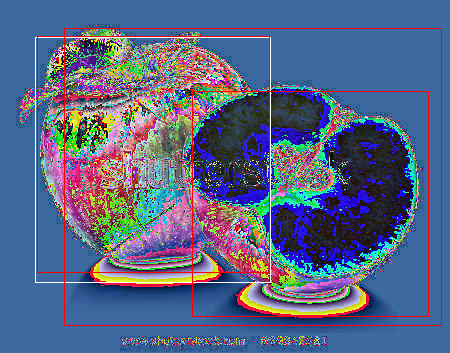

In [20]:
from PIL import ImageDraw

image = torchvision.transforms.ToPILImage()(image)
draw = ImageDraw.Draw(image)
for box in labels['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])])
    
for box in pred['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image

## Бонус (10 баллов).

__Задание__. В части с классификацией добейтесь accuracy не менее 0.52. Напишите отчёт о проделанных экспериментах.

__Критерии оценки__. Оценка за бонусную часть равна 10, если вы преодолели качество 0.52 и 0 в противном случае.

__Иных оценок кроме 0 и 10 не предусмотрено__.

In [ ]:
# YOUR CODE

## Бонус (0 баллов).

__Задание 1__. Скиньте ниже смешную картинку, желательно про машинное обучение. На картинке не должно быть никаких упоминаний лектора, семинаристов и ассистентов этого курса.

__Задание 2__. Расскажите, как вам задание? Что понравилось, что не понравилось, что можно улучшить? Мы примем во внимание любой фидбек.